In [39]:
import numpy as np
import pandas as pd

In [40]:
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering

In [41]:
data = pd.read_csv("Stocks_ClosePrice.csv")
data.dropna()

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506
5,2018/10/1,162.440002,1195.310059,381.429993,2004.359985,227.259995,-0.012359,0.001541,0.019324,0.000679,0.006711
6,2018/10/2,159.330002,1200.109985,377.140015,1971.310059,229.279999,-0.019331,0.004008,-0.011311,-0.016626,0.008849
7,2018/10/3,162.429993,1202.949951,377.049988,1952.760010,232.070007,0.019270,0.002364,-0.000239,-0.009455,0.012095
8,2018/10/4,158.850006,1168.189941,363.649994,1909.420044,227.990005,-0.022287,-0.029321,-0.036186,-0.022444,-0.017737
9,2018/10/5,157.330002,1157.349976,351.350006,1889.650024,224.289993,-0.009615,-0.009323,-0.034409,-0.010408,-0.016362
10,2018/10/8,157.250000,1148.969971,349.100006,1864.420044,223.770004,-0.000509,-0.007267,-0.006424,-0.013442,-0.002321


In [42]:
data.describe()

,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
count,250.000000,250.000000,250.000000,250.000000,250.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,168.990280,1131.450959,332.186959,1766.960642,192.087600,0.000555,0.000189,-0.001250,-0.000302,-0.000056
std,20.304559,64.740435,36.322701,138.994704,20.969335,0.020943,0.018474,0.027119,0.022313,0.020421
min,124.059998,976.219971,233.880005,1343.959961,142.190002,-0.078021,-0.080089,-0.108388,-0.081424,-0.104924
25%,151.057499,1079.439972,299.289986,1656.309967,174.757499,-0.009511,-0.007176,-0.016374,-0.009719,-0.009154
50%,169.425003,1131.809998,345.584992,1785.660034,196.345001,0.000198,0.000603,-0.001665,0.000955,0.001140
75%,186.207500,1184.642517,361.167496,1866.290008,207.479996,0.011986,0.009421,0.014430,0.010360,0.011055
max,204.869995,1287.579956,385.029999,2020.989990,232.070007,0.102704,0.099380,0.092793,0.090254,0.068053


In [43]:
dataset = data.drop(data.columns[0:6],axis = 1)
dataclean = dataset.dropna()
dataclean.values
cor = dataclean.corr()

(a) With different linkage methods, if we use the simplest hierarchical clustering to assign
portfolio weights, what are the portfolio weights for each stock?

In [44]:
hclust = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward').fit(dataclean)

In [45]:
cluster_labels_hclust = hclust.labels_
print("Clustering Result：")
print(cluster_labels_hclust)

Clustering Result：
[0 0 1 4 0 4 0 2 4 4 0 2 4 3 4 1 1 2 0 0 0 2 3 2 2 1 3 1 4 0 0 3 4 2 2 4 4
 1 4 2 4 0 4 3 0 3 0 0 1 2 1 2 1 0 1 0 2 4 1 2 4 2 2 3 0 0 1 1 2 3 1 1 0 0
 0 4 3 0 0 0 2 4 0 1 4 4 3 1 0 1 1 4 4 0 0 1 4 0 4 0 4 4 1 0 0 0 4 0 0 1 0
 4 4 1 0 0 4 0 0 0 1 1 2 0 0 4 0 0 1 1 0 0 0 0 0 0 0 0 4 0 0 0 1 1 4 1 1 0
 4 0 4 1 4 4 4 4 4 2 0 1 1 4 4 1 0 4 0 0 4 0 4 2 1 0 0 1 0 0 4 0 0 1 1 0 0
 0 0 2 0 0 0 1 0 1 0 4 1 1 4 0 0 4 4 2 4 0 0 0 0 1 4 4 4 4 4 2 1 0 1 4 4 1
 2 0 1 1 4 0 4 2 1 0 0 1 4 4 1 1 4 0 4 1 0 0 4 0 0 0 2]


In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

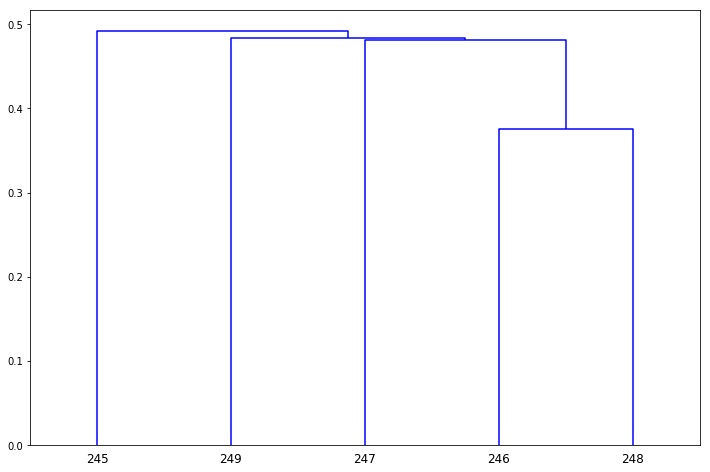

In [47]:
linked = linkage(cor,'single')
plt.figure(figsize=(12,8))
dendrogram(linked, orientation = 'top', labels = data.index, show_leaf_counts = True)
plt.show()

In [48]:
weight = [0.5, 0.25, 0.125, 0.0625, 0.0625]
means = dataclean.mean()
portfolio_return = np.dot(means, weight)
portfolio_risk = np.dot(weight,np.dot(cor, np.array(weight).T))

(b) Using the portfolio weights in (a), what are the expected return and risk in each case?

In [49]:
portfolio_return

0.0001461934881526103

In [50]:
portfolio_risk

0.7536632478514286

(c) What is the portfolio weight of the global minimum variance portfoli o using the theoretical formula? What is the expected return and risk of the global minimum variance portfolio?

In [51]:
from scipy import optimize

In [52]:
A = dataset.cov() 
A = A.values
A

array([[0.00043863, 0.00025792, 0.00030246, 0.00031941, 0.00023645],
       [0.00025792, 0.00034128, 0.00030775, 0.00030673, 0.00024614],
       [0.00030246, 0.00030775, 0.00073545, 0.0004266 , 0.00031043],
       [0.00031941, 0.00030673, 0.0004266 , 0.00049785, 0.00031595],
       [0.00023645, 0.00024614, 0.00031043, 0.00031595, 0.000417  ]])

In [53]:
invA = np.linalg.inv(A)
i = np.ones((1, 5))
m = np.dot(i, invA)/ np.dot(i,np.dot(invA, i.T))
m

array([[ 0.26485787,  0.51997486, -0.00609811, -0.10746058,  0.32872597]])

In [54]:
np.sum(m)

1.0

In [55]:
dataset.mean()

FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64

In [56]:
port_return = np.dot(m, dataset.mean())
print('Expect Return:')
print(port_return)

Expect Return:
[0.00026701]


In [57]:
port_risk = np.dot(m,np.dot(A, m.T))
print('Risk:')
print(port_risk)

Risk:
[[0.00029185]]


(d) If there are no short sales constrains for constructing a portfolio, usin g Monte Carlo
simaultion to find the portfolio weight for the global m inimum portfolio. What is the
expected return and the risk of this portfolio.

In [58]:
import math
import random

In [70]:
np.random.seed(450)
num_ports = 10000
all_weights = np.zeros((num_ports, len(dataset.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    all_weights[x,:] = weights
    ret_arr[x] = np.sum( (dataset.mean() * weights *252))
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(dataset.cov() * 252, weights)))
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

The return-variance picture looks better when the return and volatility are multiplied by 252.

In [71]:
minvol = vol_arr.min()
index_vol = vol_arr.tolist().index(minvol)

In [72]:
minret = ret_arr.tolist()[index_vol]

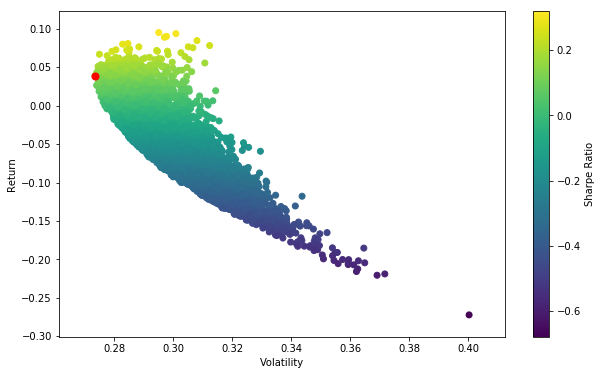

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(minvol, minret,c='red', s=50)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

The red spot is the point that has the smallest variance.

In [76]:
print("The return of the previous portfolio :")
minret

The return of the previous portfolio :


0.03883012555149666

In [77]:
print("The risk of the previous portfolio　:")
minvol

The risk of the previous portfolio　:


0.27343270174964107